In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('acc')>0.99):
            print("\nReached 99% accuracy so cancelling traing!!!...")
            self.model.stop_training=True
callbacks=myCallback()

In [4]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax")
])

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
__________

In [6]:
#from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [7]:
datagen=ImageDataGenerator(rescale=1.0/255.0,
                          height_shift_range=0.2,
                          width_shift_range=0.2,
                          zoom_range=0.2,
                          fill_mode="nearest")

TRAIN_DIR="F:/Study Materials/Courses/ML/Rock_paper_scissors/rps/rps"
VALIDATION_DIR="F:/Study Materials/Courses/ML/Rock_paper_scissors/rps-validation"
train_generator=datagen.flow_from_directory(TRAIN_DIR,batch_size=20,target_size=(150,150),class_mode="categorical")
validation_generator=datagen.flow_from_directory(VALIDATION_DIR,batch_size=20,target_size=(150,150),class_mode="categorical")


Found 2520 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


In [ ]:
history=model.fit_generator(train_generator,epochs=20,verbose=1,validation_data=validation_generator,callbacks=[callbacks])

Epoch 1/20
126/126 [==============================] - 150s 1s/step - loss: 0.8710 - acc: 0.5679 - val_loss: 0.6526 - val_acc: 0.7273
Epoch 2/20
  7/126 [>.............................] - ETA: 2:20 - loss: 0.4953 - acc: 0.7929

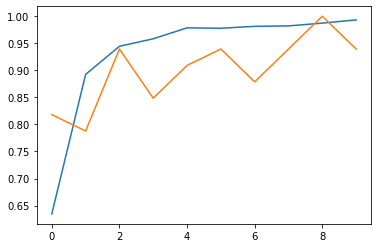

In [77]:
import matplotlib.pyplot as plt
acc=history.history["acc"]
loss=history.history["loss"]
val_acc=history.history["val_acc"]
val_loss=history.history["val_loss"]
plt.plot(acc)
plt.plot(val_acc)
plt.show()

In [85]:
import os
import shutil
import numpy as np
from shutil import copyfile
from tkinter import filedialog
from tkinter import *
from tensorflow.keras.preprocessing import image

root = Tk()
files = filedialog.askopenfilenames(parent=root,initialdir = "F:\Study Materials\Courses\ML\Rock_paper_scissors\rps-validation" , title = "Select File")
path_list=root.tk.splitlist(files)
#print(files)
root.destroy()
for path in path_list:
    img=image.load_img(path, target_size=(150,150))

    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images = np.vstack([x])

    classes = model.predict(images)
    #print(classes)
    #print(np.argmax(classes))
    switcher={
        0: "Paper",
        1: "Rock",
        2: "Scissors"
    }
    print (switcher.get(np.argmax(classes)))


Scissors
